---

## `Contexte du projet`

L’objectif du projet est de prédire le comportement des clients afin d’anticiper le churn et de permettre à l’entreprise de mettre en place des actions de rétention ciblées et efficaces. En exploitant l’ensemble des données clients disponibles, il devient possible d’identifier les profils les plus susceptibles de partir et de concevoir des programmes de fidélisation adaptés, optimisant ainsi les investissements marketing et réduisant les pertes de revenus.


## `Description du jeu de données`

Chaque ligne du jeu de données correspond à un client, et chaque colonne représente une caractéristique décrite dans la documentation fournie par l'entreprise.

Le dataset contient notamment :

`1. Indicateur de churn`
   
- La variable cible (Churn) indiquant si le client a resilié son contrat au cours du dernier mois.
  
`2. Informations sur les services souscrits`

- Téléphonie (ligne simple ou multiple)
- Internet (DSL, fibre optique)
- Services additionnels : sécurité en ligne, sauvegarde en ligne, protection d’appareil, support technique
- Services de streaming : TV et films

`3. Informations liées au compte client`

- Ancienneté du client
- Type de contrat (mensuel, annuel, biannuel)
- Méthode de paiement
- Facturation électronique
- Montant mensuel facturé
- Total des dépenses cumulées

`4. Données démographiques`

- Genre
- Situation familiale : présence d’un partenaire ou de personnes à charge


---

## `Analyse Exploratoire des données`


### `Objectif`
- Comprendre du mieux que possible nos données.
- Développer une prémière stratégie de modélisation. 


### `Checklist de base`

**Analyse de forme** : 

- Variable target : `Churn`
- Lignes et colonnes : 7043, 21
- Types de variables : quantitatives (3), qualitative (18)
- Analyse des valeurs manquantes : Aucune valeur manquante
- Données duplicées : Aucun doublon


**Analyse de Fond** : 

- Visualisation de la target : 26% de résiliation
- Signification des variables : Les variables binaires recodées en 0 et 1. Les variables avec plus de 2 catégories transformées en dummies. Pour les variables quantitatives, distribution assymétrie positive et non standardisées. 
  
- Relation variables/Target :



---

## `Inspection des données`

In [2]:
# Packages 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import os 

In [3]:
# Nous sommmes dans le dossier notebooks
os.getcwd()

'C:\\Users\\LENOVO\\Documents\\Projets_ML\\Telco-Customer-Churn-ML\\notebooks'

In [4]:
# acine du repertoire de travail 
os.chdir("..")
os.getcwd()

'C:\\Users\\LENOVO\\Documents\\Projets_ML\\Telco-Customer-Churn-ML'

In [5]:
# Charger la base de données 
df = pd.read_csv('src/data/raw/Telco-Customer-Churn.csv')

# Copie dataset
df_copy = df.copy()

In [6]:
# Dimension du dataset 
df.shape

(7043, 21)

In [7]:
# Option pour visualiser l'ensemble du dataset 
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [8]:
# Les 5 premières lignes du dataset 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Info dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Données manquantes ?
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Description rapide de toutes les variables (y compris les variables quali)
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


### `Note :`

- Aucune valeur manquante détectée.
- La variable TotalCharges est de type object et sera changé en type float. 
- Les variables quali ont des catégories entre 2, 3 ou 4. 
- Les variables  avec 2 modalités seront recodées en 0 et 1.
- Pour les variables avec plus de 2 modalités feront l'objet d'une transformation One-Hot encoding.
  

---

## `Compréhension des données`

In [12]:
## Convertir TotalCharges en numérique
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# suppression la colonne CustomerID
df = df.drop('customerID', axis=1)

In [13]:
# Description de variables catégorielles 
def describe_cat(df):
    """
    Retourne un DataFrame propre décrivant toutes les variables qualitatives.
    """
    cat_cols = df.select_dtypes(include=["object", "category"]).columns
    rows = []

    for col in cat_cols:
        vc = df[col].value_counts()
        pct = df[col].value_counts(normalize=True).mul(100).round(2)

        for modality in vc.index:
            rows.append({
                "Variable": col,
                "Modalité": modality,
                "Effectif": vc[modality],
                "Pourcentage (%)": pct[modality]
            })

    return pd.DataFrame(rows)


def describe_cat_style(df):
    desc = describe_cat(df)
    return (desc.style
            .background_gradient(subset=["Effectif"], cmap="Blues")
            .format({"Pourcentage (%)": "{:.2f} %"})
            .hide(axis="index"))



In [14]:
# Résultats description uni
describe_cat_style(df.drop(["TotalCharges"], axis=1))   

Variable,Modalité,Effectif,Pourcentage (%)
gender,Male,3555,50.48 %
gender,Female,3488,49.52 %
Partner,No,3641,51.70 %
Partner,Yes,3402,48.30 %
Dependents,No,4933,70.04 %
Dependents,Yes,2110,29.96 %
PhoneService,Yes,6361,90.32 %
PhoneService,No,682,9.68 %
MultipleLines,No,3390,48.13 %
MultipleLines,Yes,2971,42.18 %


In [15]:
# Fonction croisement variable catégorielles 
def cross_churn(df, target="Churn"):
    rows = []
    cat_cols = df.select_dtypes(include=["object", "category"]).columns
    cat_cols = [col for col in cat_cols if col != target]

    for col in cat_cols:
        ct = pd.crosstab(df[col], df[target])
        pct = pd.crosstab(df[col], df[target], normalize="index").mul(100).round(2)

        for modality in ct.index:
            rows.append({
                "Variable": col,
                "Modalité": modality,
                "Churn=No": ct.loc[modality, "No"],
                "Churn=Yes": ct.loc[modality, "Yes"],
                "% Churn=No": pct.loc[modality, "No"],
                "% Churn=Yes": pct.loc[modality, "Yes"]
            })

    return pd.DataFrame(rows)



def cross_churn_style(df, target="Churn"):
    rapport = cross_churn(df, target)
    return (rapport.style
            .background_gradient(subset=["Churn=Yes"], cmap="Reds")
            .background_gradient(subset=["Churn=No"], cmap="Blues")
            .format({"% Churn=Yes": "{:.2f} %", "% Churn=No": "{:.2f} %"})
            .hide(axis="index"))
    

In [38]:
df["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            1739
No             1526
Name: count, dtype: int64

In [16]:
# Résultats analyse biva
cross_churn_style(df.drop(["TotalCharges"], axis=1))

Variable,Modalité,Churn=No,Churn=Yes,% Churn=No,% Churn=Yes
gender,Female,2549,939,73.08 %,26.92 %
gender,Male,2625,930,73.84 %,26.16 %
Partner,No,2441,1200,67.04 %,32.96 %
Partner,Yes,2733,669,80.34 %,19.66 %
Dependents,No,3390,1543,68.72 %,31.28 %
Dependents,Yes,1784,326,84.55 %,15.45 %
PhoneService,No,512,170,75.07 %,24.93 %
PhoneService,Yes,4662,1699,73.29 %,26.71 %
MultipleLines,No,2541,849,74.96 %,25.04 %
MultipleLines,No phone service,512,170,75.07 %,24.93 %


---

### `Churn Vs Variables quant`

In [17]:
def quant_vs_churn(df, cols, target="Churn"):
    """
    Visualise simplement la relation entre des variables quantitatives et Churn
    via des boxplots.
    """
    ncols = 3
    nrows = int(len(cols) / ncols) + (len(cols) % ncols > 0)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]
        sns.boxplot(data=df, x=target, y=col, ax=ax)
        ax.set_title(f"{col} selon {target}")
        ax.set_xlabel(target)
        ax.set_ylabel(col)

    # Supprimer les axes vides si besoin
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


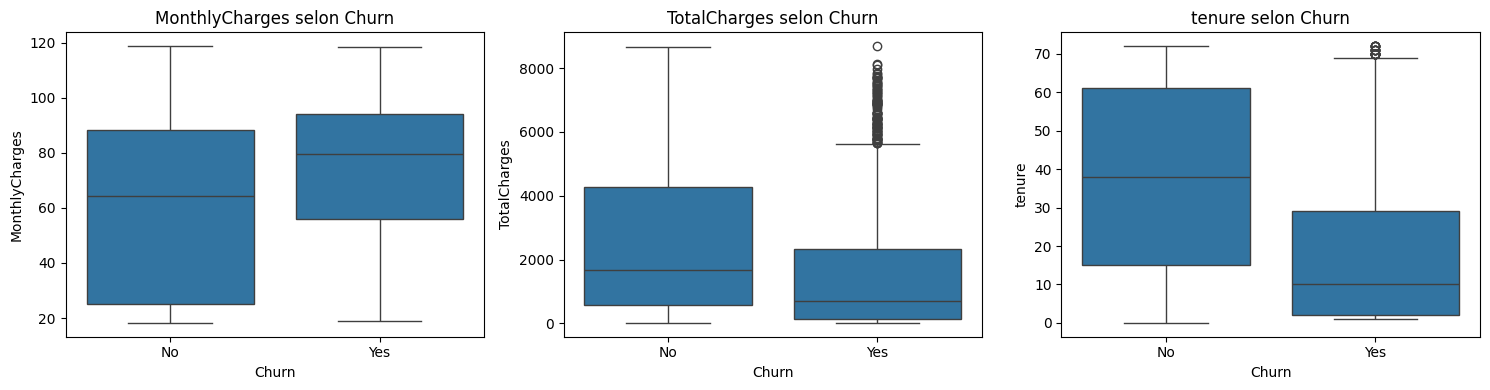

In [18]:
# Résultats 
cols = ["MonthlyCharges", "TotalCharges", "tenure"]
quant_vs_churn(df=df, cols=cols, target="Churn")


In [19]:
# Charges moyennes 
df.groupby("Churn")["MonthlyCharges"].mean()


Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

---


### `Premiers résultats`



- ### `Univariée :`  

Notre population d’étude est composée de 7 043 clients, avec un taux de churn global de 26,5 %, ce qui signifie qu’environ un client sur quatre a résilié.

D’un point de vue démographique, la population est équilibrée entre hommes et femmes. En revanche, elle est majoritairement composée de clients sans personnes à charge (70 %) et légèrement plus souvent sans partenaire. On observe donc une proportion importante de ménages individuels.

Sur le plan des services, 90 % des clients disposent d’un service téléphonique et près de 80 % ont un accès Internet, dont une part importante en fibre optique. Cependant, une grande partie des clients ne souscrit pas aux services additionnels comme la sécurité ou le support technique.

Concernant l’engagement, 55 % des clients sont en contrat mensuel, donc sans engagement long terme. Enfin, la majorité utilise la facturation électronique, et le moyen de paiement le plus fréquent est l’electronic check.

Dans l’ensemble, nous avons donc une clientèle plutôt digitalisée, majoritairement engagée sur du court terme, avec un taux de résiliation significatif qui justifie une analyse approfondie des facteurs explicatifs.



- ### `Bivariée :` 

L’analyse descriptive des tableaux de contingence met en évidence plusieurs variables susceptibles d’être associées au **Churn**.

Tout d’abord, `le type de contrat` apparaît comme le facteur le plus discriminant. Les clients en contrat month-to-month présentent un taux de churn très élevé (42,7 %), alors que ce taux chute fortement pour les contrats d’un an (11,3 %) et devient très faible pour les contrats de deux ans (2,8 %). Cela suggère qu’un engagement long constitue un puissant levier de rétention.

Ensuite, le `type de service internet` joue un rôle important. Les clients disposant de la fibre optique présentent un taux de churn nettement supérieur (41,9 %) à ceux utilisant le DSL (19,0 %) ou n’ayant pas d’internet (7,4 %). Ce résultat peut refléter des `attentes plus élevées`, `une sensibilité au prix` ou `une concurrence plus forte sur ce segment`.

Les `services additionnels` (Online Security, Tech Support, Online Backup, Device Protection) montrent également un effet marqué. Les clients ne disposant pas de ces options résilient près de trois fois plus que ceux qui y ont souscrit. Cela suggère qu’un niveau d’équipement plus élevé renforce l’attachement au service.

Le `mode de paiement` constitue un autre facteur notable. Les clients payant par electronic check présentent le taux de churn le plus élevé (45,3 %), tandis que les paiements automatiques (carte bancaire ou virement) sont associés à des taux bien plus faibles (environ 15–17 %). Le paiement automatique semble donc corrélé à une plus grande stabilité.

Les variables liées à la `situation familiale` montrent également un effet : les clients ayant un partenaire ou des personnes à charge résilient nettement moins. Cela peut traduire un besoin accru de stabilité et une moindre propension à changer de fournisseur.

La charge mensuelle joue un rôle important dans le comportement économique des clients. Ceux qui quittent l'entreprise dépensent en moyenne 74 euros par mois soit 13,17 euros de plus que les autres.



---

### `Service Téléphonique Vs Variables catégorielles` 

### `Quelques questions :` 

- Quel est le niveau d’engagement contractuel des clients ne disposant pas de service téléphonique ?
- Quels services alternatifs ou complémentaires ces clients ont-ils souscrits ?
- Ces clients compensent-ils l’absence de service téléphonique par une offre Internet spécifique ?
- Quel est leur comportement de paiement et présentent-ils un profil financier particulier ?
- Leur taux de résiliation est-il supérieur à celui des autres segments de clientèle ?


In [20]:
def cross_phone(df, variables, ref="PhoneService"):
    rows = []

    for col in variables:
        if col not in df.columns:
            continue
        
        ct = pd.crosstab(df[ref], df[col])
        pct = pd.crosstab(df[ref], df[col], normalize="index").mul(100).round(2)

        for modality in ct.columns:
            rows.append({
                "Variable": col,
                "Modalité": modality,
                f"{ref}=No": ct.loc["No", modality] if "No" in ct.index else None,
                f"{ref}=Yes": ct.loc["Yes", modality] if "Yes" in ct.index else None,
                f"% {ref}=No": pct.loc["No", modality] if "No" in pct.index else None,
                f"% {ref}=Yes": pct.loc["Yes", modality] if "Yes" in pct.index else None,
            })

    return pd.DataFrame(rows)


def cross_phoneservices(df, variables, ref="PhoneService"):
    rapport = cross_phone(df, variables, ref)
    return (rapport.style
            .background_gradient(subset=[f"{ref}=Yes"], cmap="Reds")
            .background_gradient(subset=[f"{ref}=No"], cmap="Blues")
            .format({f"% {ref}=Yes": "{:.2f} %", f"% {ref}=No": "{:.2f} %"})
            .hide(axis="index"))
    

In [21]:
vars_to_cross = ["InternetService", "Contract", "MultipleLines", "OnlineSecurity", "OnlineBackup", 
                 "DeviceProtection", "StreamingMovies", "TechSupport", "StreamingTV", 
                 "PaperlessBilling", "PaymentMethod", "Churn"]

cross_phoneservices(df, vars_to_cross)


Variable,Modalité,PhoneService=No,PhoneService=Yes,% PhoneService=No,% PhoneService=Yes
InternetService,DSL,682,1739,100.00 %,27.34 %
InternetService,Fiber optic,0,3096,0.00 %,48.67 %
InternetService,No,0,1526,0.00 %,23.99 %
Contract,Month-to-month,376,3499,55.13 %,55.01 %
Contract,One year,145,1328,21.26 %,20.88 %
Contract,Two year,161,1534,23.61 %,24.12 %
MultipleLines,No,0,3390,0.00 %,53.29 %
MultipleLines,No phone service,682,0,100.00 %,0.00 %
MultipleLines,Yes,0,2971,0.00 %,46.71 %
OnlineSecurity,No,399,3099,58.50 %,48.72 %


### `Analyse`

- Les clients sans service téléphonique (682 clients) sont exclusivement des clients Internet DSL : ils ne disposent ni de fibre ni d’absence d’Internet.
- Leur niveau d’engagement contractuel est similaire au reste de la clientèle (55 % en contrat mensuel, environ 21 % en contrat d’un an et 24 % sur deux ans), ce qui ne traduit pas un sous-engagement particulier.
- Ils présentent un niveau d’équipement en services additionnels relativement équilibré (environ 40 à 45 % ont souscrit aux options comme sécurité, support ou sauvegarde), ce qui montre qu’il ne s’agit pas uniquement d’un segment basique.
- Leur mode de paiement est comparable au reste des clients, avec une prédominance de l’electronic check.

Enfin, leur taux de churn est légèrement inférieur à la moyenne (24,9 % contre 26,7 %), ce qui indique qu’ils ne constituent pas un segment particulièrement à risque.

---

## `Préparation des données`

#### `Séléction de clients avec un service téléphonique`

In [22]:
df = df[df["PhoneService"] == "Yes"]

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No


In [23]:
df.shape

(6361, 20)

In [24]:
df = df.drop("PhoneService", axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No


### `Encodage variables binaires` 

In [25]:
# Variables bianires (Soit Yes/No soit Male/Female)
binary_cols = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'Churn']

# Coder Yes/No et Male/Female en 0/1
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0,'Male': 1, 'Female': 0})


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16912\2453734638.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0,'Male': 1, 'Female': 0})


### `Encodage One-Hot` 

In [109]:
# Variable catégorielle avec plus 2 catégories
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

# One-hot encode
df_dummies1 = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)
#df_dummies2 = pd.get_dummies(df, columns=multi_cat_cols)


In [110]:
# Vérification (Ok)
df_dummies1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,1,0,0,0,34,0,56.95,1889.50,0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,53.85,108.15,1,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0,0,0,0,2,1,70.70,151.65,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5,0,0,0,0,8,1,99.65,820.50,1,True,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False
6,1,0,0,1,22,1,89.10,1949.40,0,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False


In [111]:
# Dimension df_dummie1
df_dummies1.shape

(6361, 29)

---

## `Mise en forme et suppression de variables`

In [112]:
# Convertir les bool en int
bool_cols = df_dummies1.select_dtypes(include='bool').columns
df_dummies1[bool_cols] = df_dummies1[bool_cols].astype(int) # convertir True/False en 1/0 pour toutes les colonnes bool

In [113]:
# Tout est Ok sur le type des variables dans le dataset 
df_dummies1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 1 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 6361 non-null   int64  
 1   SeniorCitizen                          6361 non-null   int64  
 2   Partner                                6361 non-null   int64  
 3   Dependents                             6361 non-null   int64  
 4   tenure                                 6361 non-null   int64  
 5   PaperlessBilling                       6361 non-null   int64  
 6   MonthlyCharges                         6361 non-null   float64
 7   TotalCharges                           6352 non-null   float64
 8   Churn                                  6361 non-null   int64  
 9   MultipleLines_Yes                      6361 non-null   int64  
 10  InternetService_Fiber optic            6361 non-null   int64  
 11  InternetS

---

### `VIF - Multicolinéarité`

In [114]:
# pip install statsmodels

In [115]:
# Run VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# We need to collapse redundant columns before running VIF
df_dummies1['No_internet_service'] = (
    df_dummies1['OnlineSecurity_No internet service'] |
    df_dummies1['OnlineBackup_No internet service'] |
    df_dummies1['DeviceProtection_No internet service'] |
    df_dummies1['TechSupport_No internet service'] |
    df_dummies1['StreamingTV_No internet service'] |
    df_dummies1['StreamingMovies_No internet service']
).astype(int)

# Drop the original redundant dummies
drop_cols = [col for col in df_dummies1.columns if 'No internet service' in col]
df_dummies1 = df_dummies1.drop(columns=drop_cols)

# Handle PhoneService redundancy
if 'MultipleLines_No phone service' in df_dummies1.columns:
    df_dummies1['No_phone_service'] = df_dummies1['MultipleLines_No phone service'].astype(int)
    df_dummies1 = df_dummies1.drop(columns=['MultipleLines_No phone service'])


# Prepare X
X = df_dummies1.drop(columns=['Churn'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)


# Remove rows with missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)


C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                  feature        VIF
10                     InternetService_No        inf
22                    No_internet_service        inf
6                          MonthlyCharges  47.629601
7                            TotalCharges  23.236023
4                                  tenure  21.993957
9             InternetService_Fiber optic  10.095423
18                      Contract_Two year   3.549849
16                    StreamingMovies_Yes   3.450203
15                        StreamingTV_Yes   3.401755
5                        PaperlessBilling   3.009521
20         PaymentMethod_Electronic check   2.963017
2                                 Partner   2.858831
8                       MultipleLines_Yes   2.775471
13                   DeviceProtection_Yes   2.570065
12                       OnlineBackup_Yes   2.522836
21             PaymentMethod_Mailed check   2.391402
14                        TechSupport_Yes   2.389482
11                     OnlineSecurity_Yes   2.


### `Note :` 

Les VIF infinis montrent que certaines variables sont parfaitement redondantes, notamment `InternetService_No` et `No_internet_service`. Elles décrivent exactement la même information et créent une multicolinéarité totale. 

Les variables tarifaires comme `MonthlyCharges`, `TotalCharges`, `tenure` et `InternetService_Fiber optic` présentent aussi des VIF élevés. Cela s’explique par leur relation structurelle. Les charges mensuelles augmentent avec le nombre de services, et TotalCharges dépend directement de MonthlyCharges et de tenure. 



---

### `Matrice de corrélation`

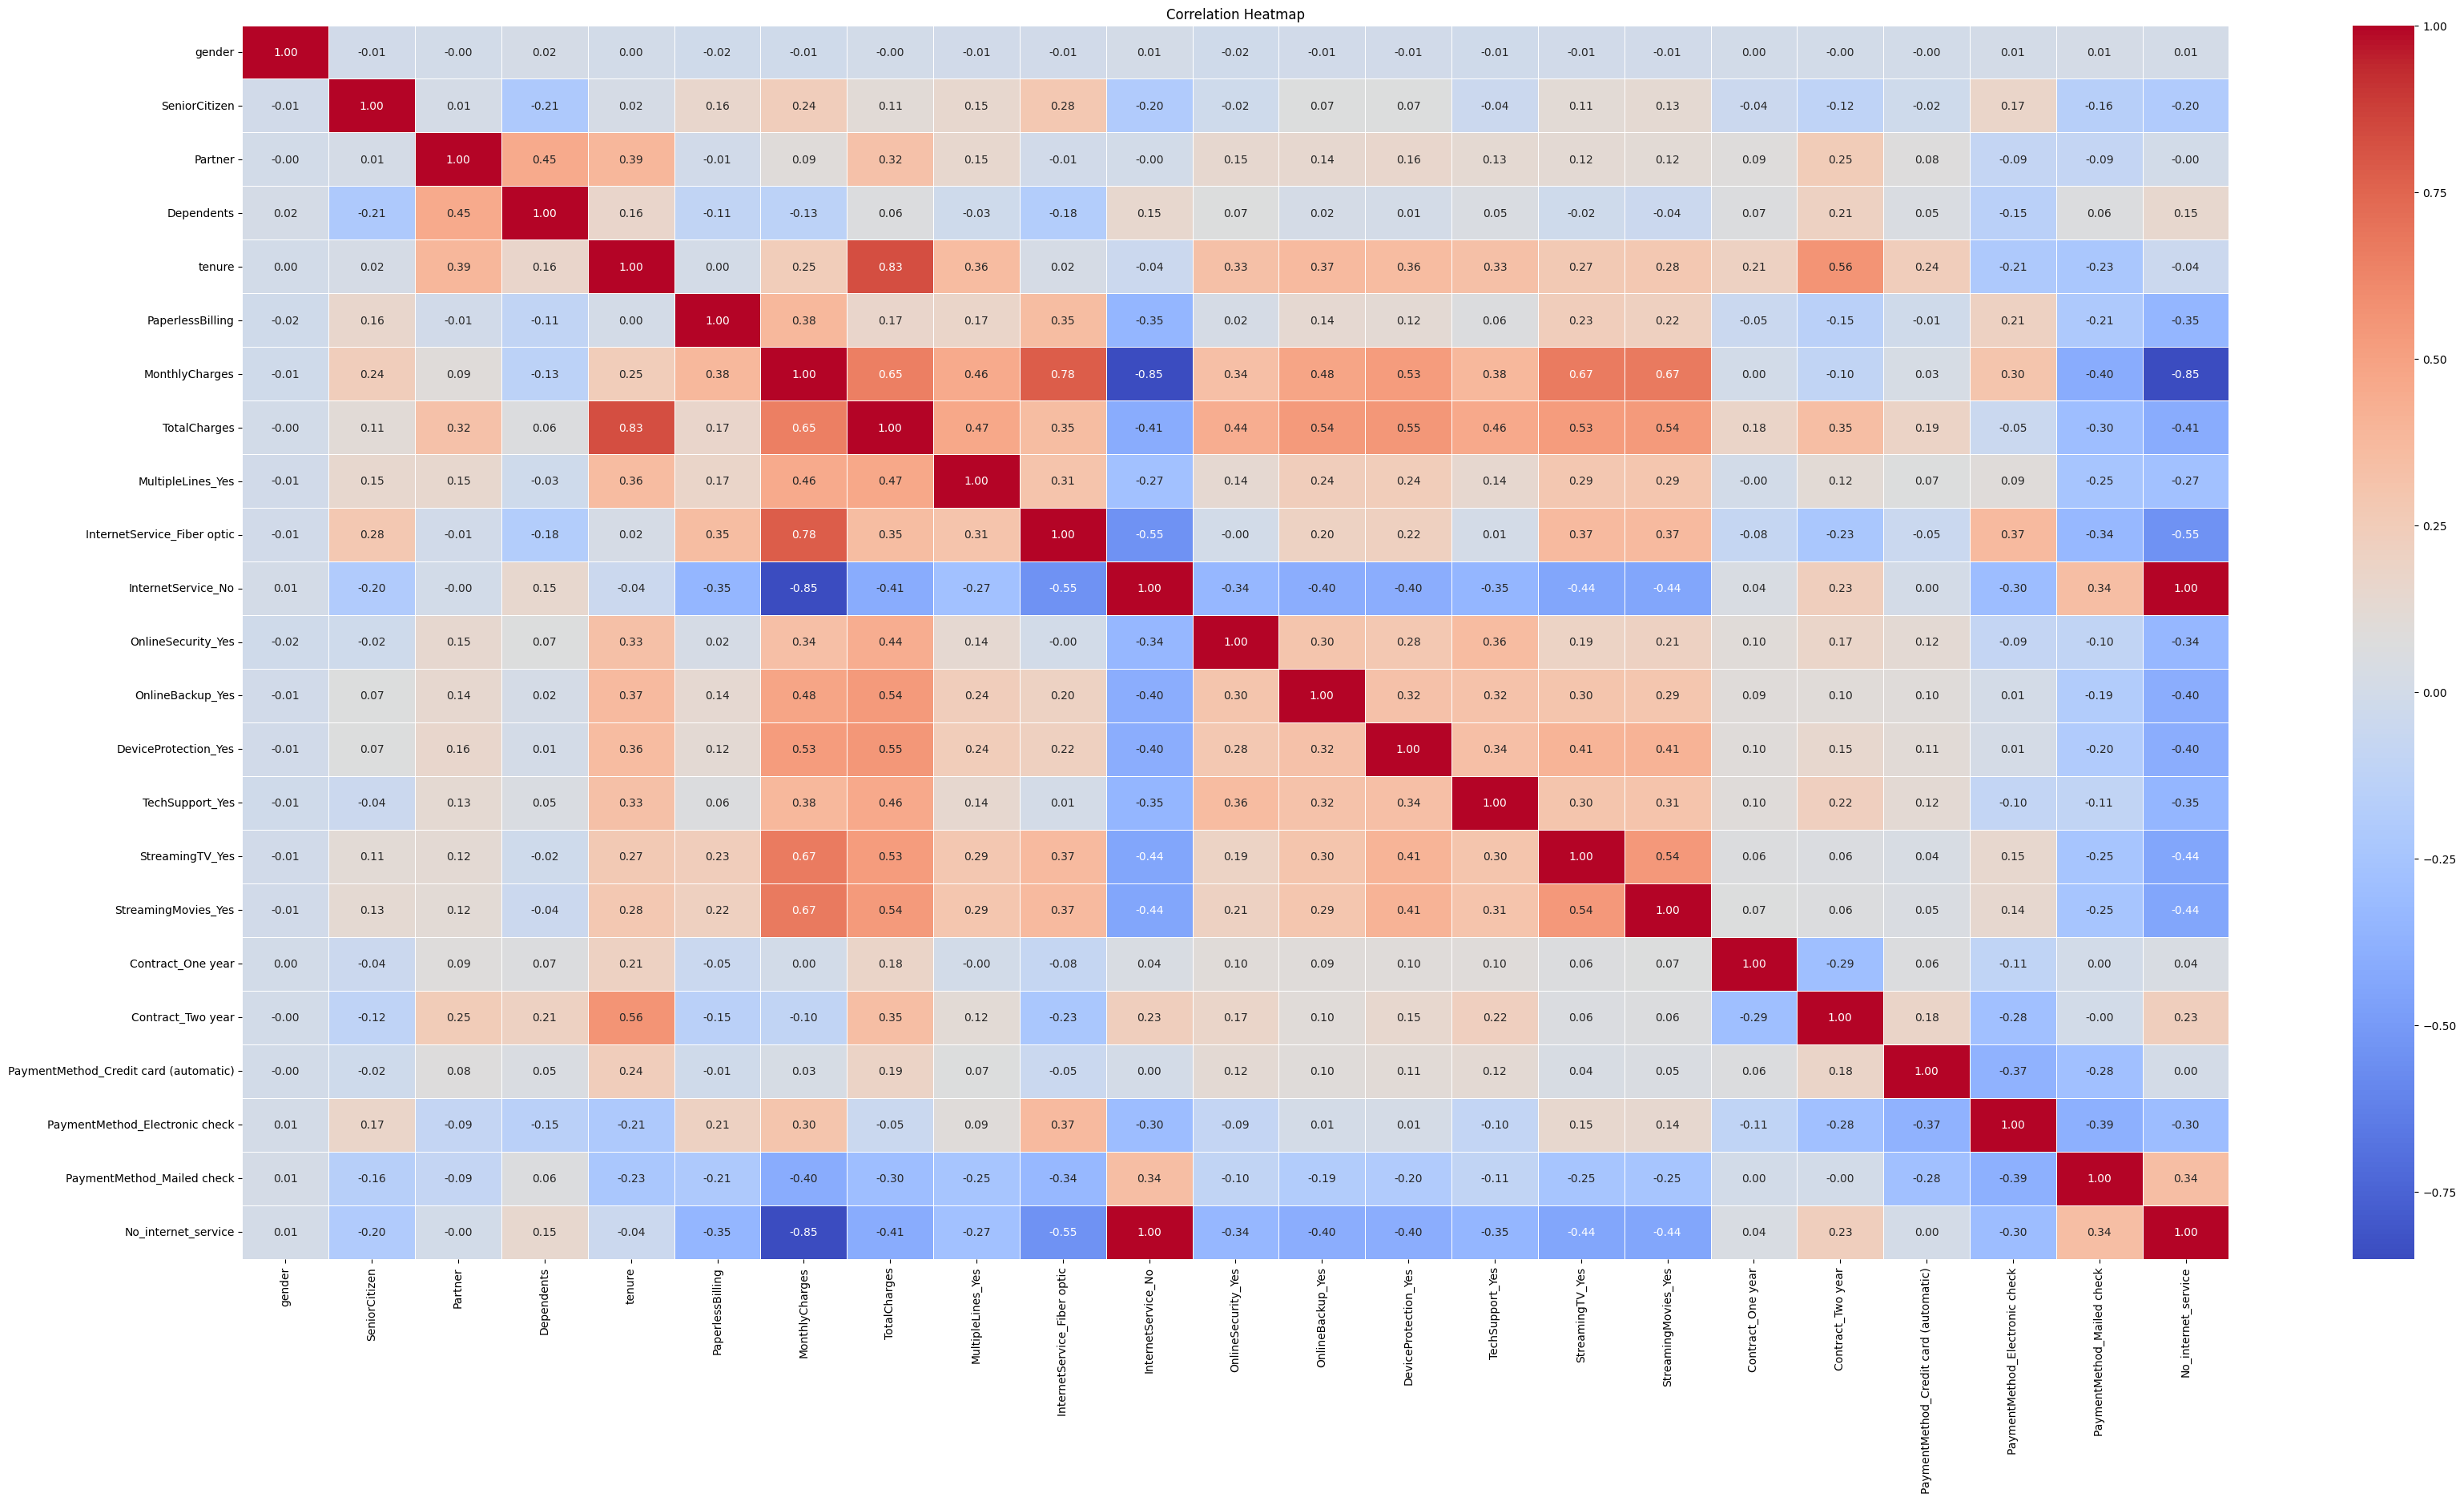

In [116]:
# Présence de forte corrélation ? ===> Oui, coéfficient de corrélation supérieur à 95%.  
df_cor = df_dummies1.drop("Churn", axis=1).corr()

# Heatmap
plt.figure(figsize=(40,20))
sns.heatmap(df_cor, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.7)
plt.title("Correlation Heatmap")
plt.show()

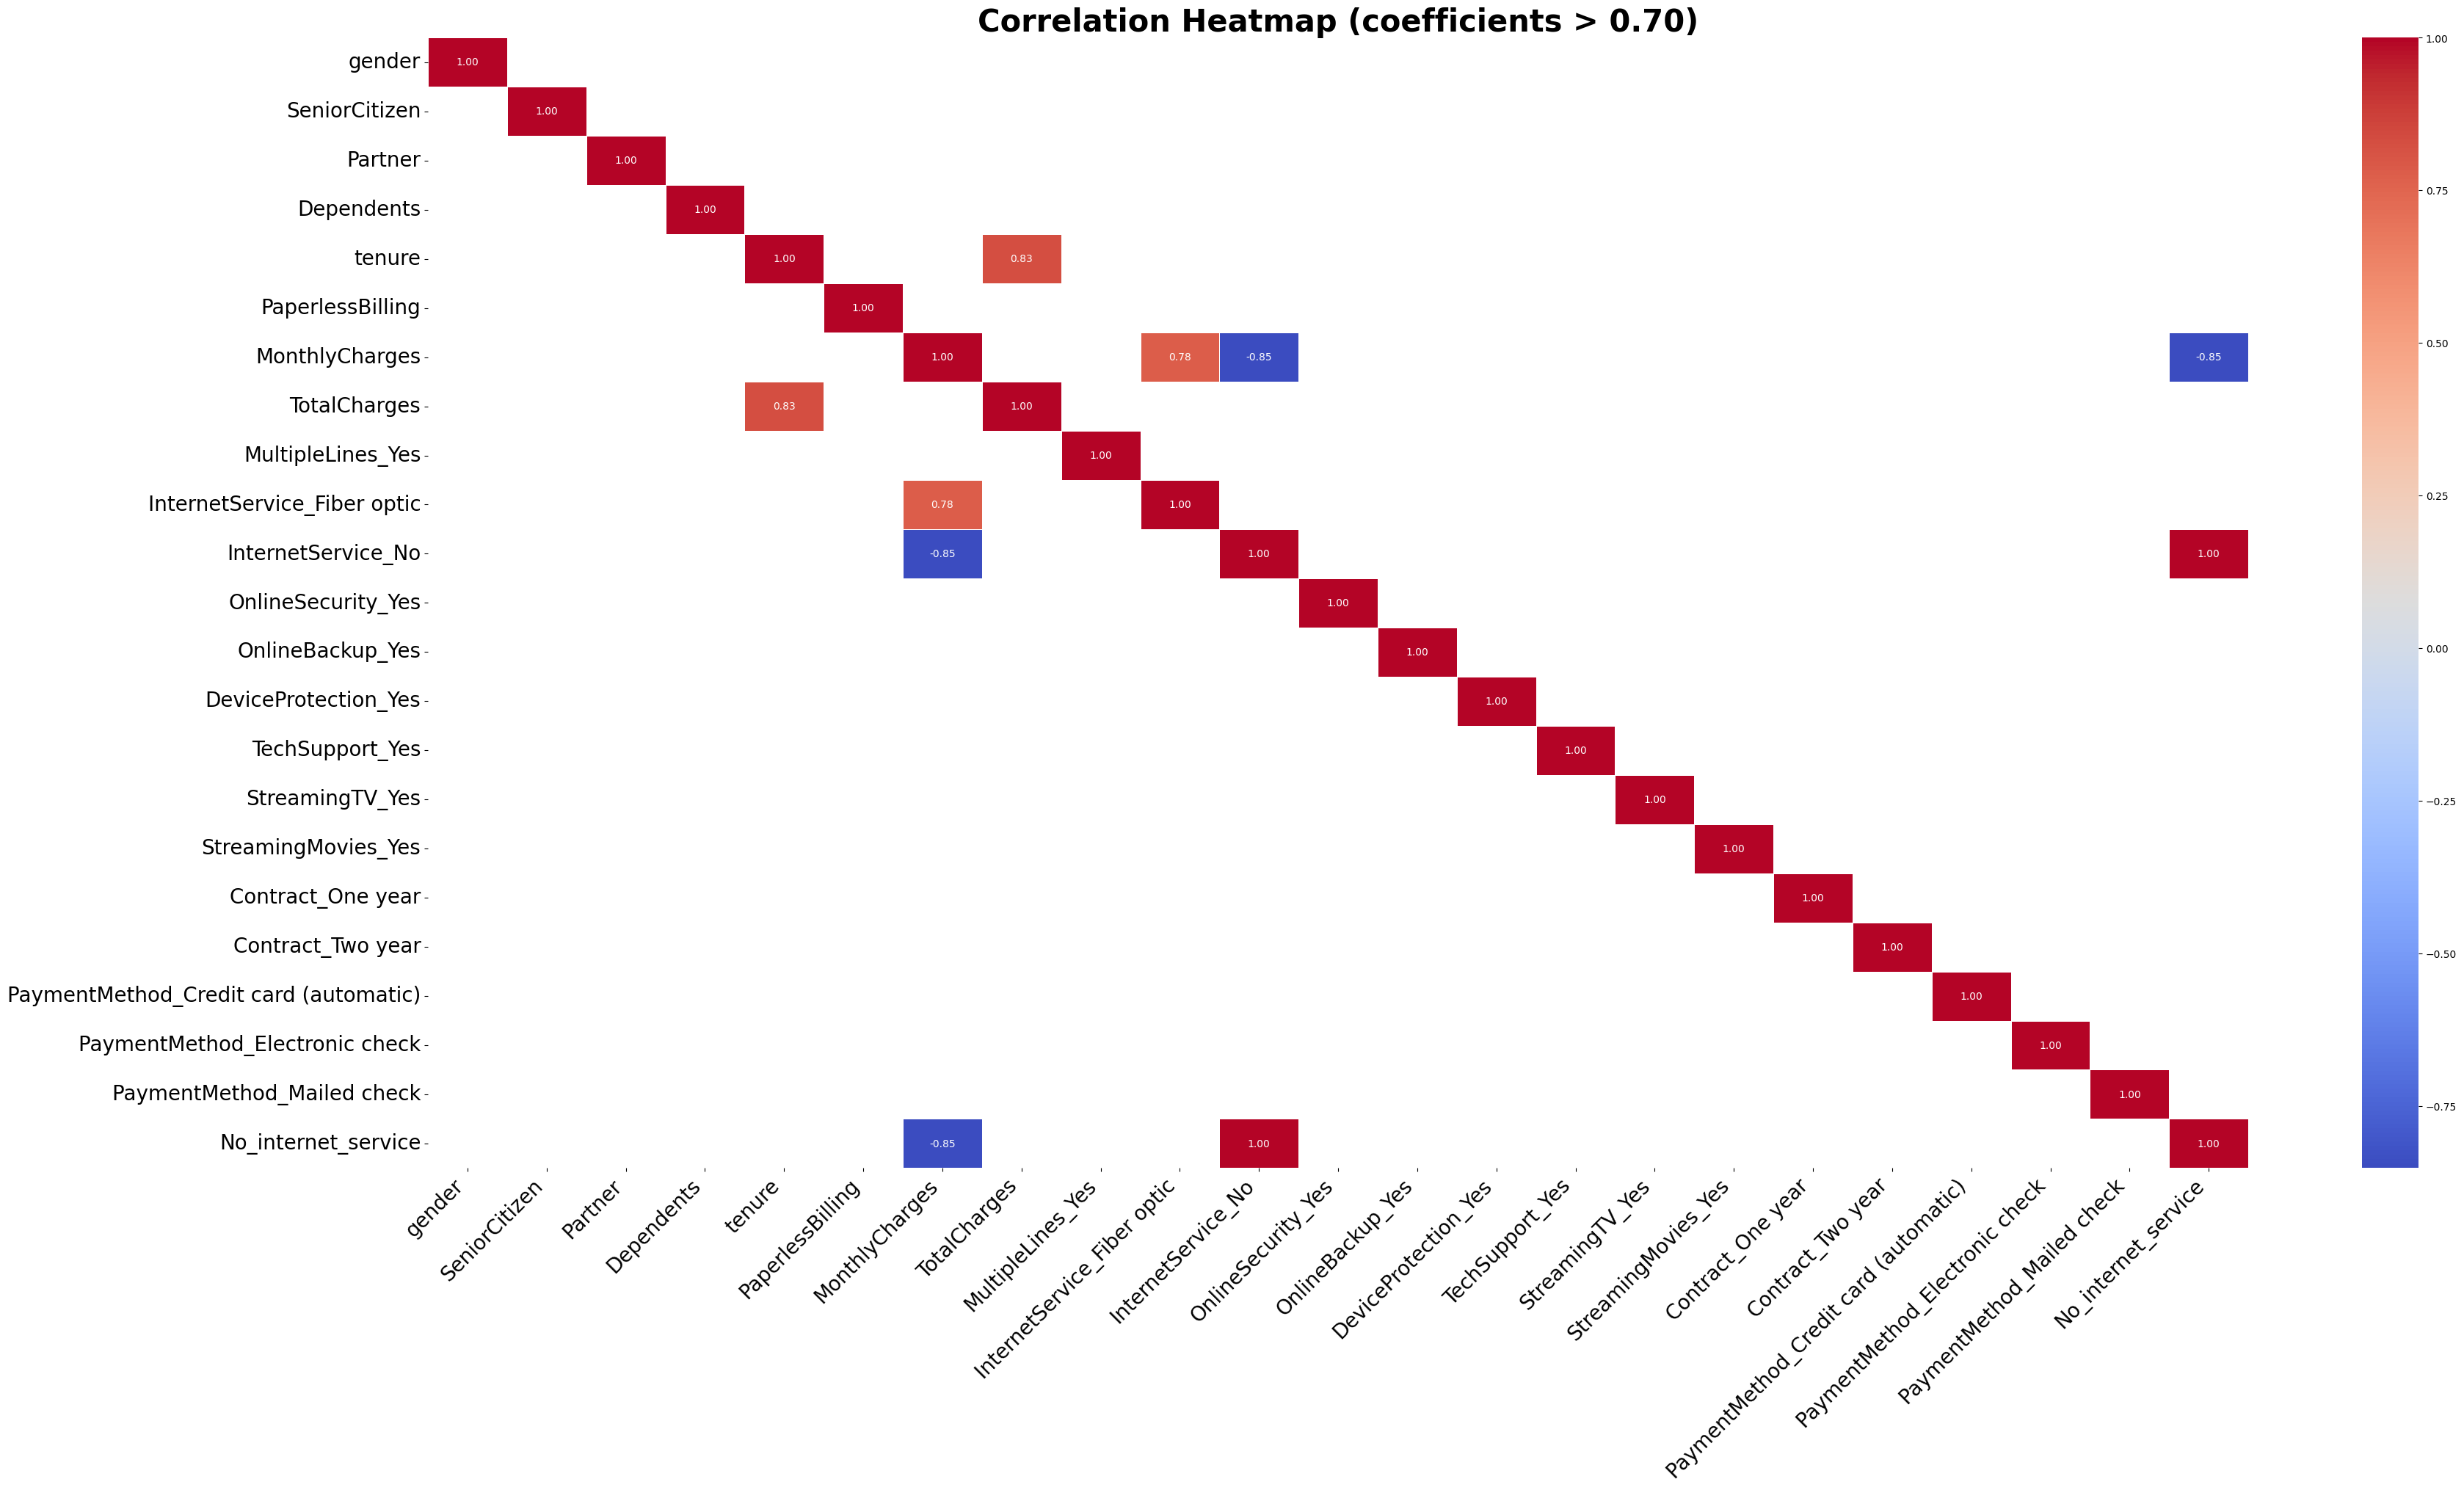

In [117]:
# Matrice de corrélation
df_cor = df_dummies1.drop("Churn", axis=1).corr()

# Filtrer uniquement les corrélations > 0.70
mask = np.abs(df_cor) >= 0.70

# Garder uniquement les lignes/colonnes pertinentes
df_cor_filtered = df_cor.where(mask).dropna(how="all").dropna(axis=1, how="all")

# Même design que ton graphique original
plt.figure(figsize=(40,20))
sns.heatmap(
    df_cor_filtered,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.7
)

plt.xticks(fontsize=20, rotation=45, ha="right")
plt.yticks(fontsize=20)

plt.title("Correlation Heatmap (coefficients > 0.70)", fontsize=30, weight="bold")
plt.show()



---

### `Suppression variables & VIF`

In [118]:
# cols_to_delete = ["No_internet_service", "MonthlyCharges"] # "No_phone_service",
cols_to_delete = ["No_internet_service", "InternetService_No", "TotalCharges", "MonthlyCharges", "tenure"] # "No_phone_service",
df_dummies1 = df_dummies1.drop(cols_to_delete, axis=1)

In [119]:
# Prepare X
X = df_dummies1.drop(columns=['Churn'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)


# Remove rows with missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

                                  feature       VIF
6             InternetService_Fiber optic  3.212818
2                                 Partner  2.704413
4                        PaperlessBilling  2.695123
12                    StreamingMovies_Yes  2.673016
11                        StreamingTV_Yes  2.660960
5                       MultipleLines_Yes  2.331000
9                    DeviceProtection_Yes  2.148161
16         PaymentMethod_Electronic check  2.128558
8                        OnlineBackup_Yes  1.963807
3                              Dependents  1.941544
14                      Contract_Two year  1.930104
10                        TechSupport_Yes  1.903897
0                                  gender  1.846552
7                      OnlineSecurity_Yes  1.718412
15  PaymentMethod_Credit card (automatic)  1.608974
13                      Contract_One year  1.514135
17             PaymentMethod_Mailed check  1.399411
1                           SeniorCitizen  1.367055


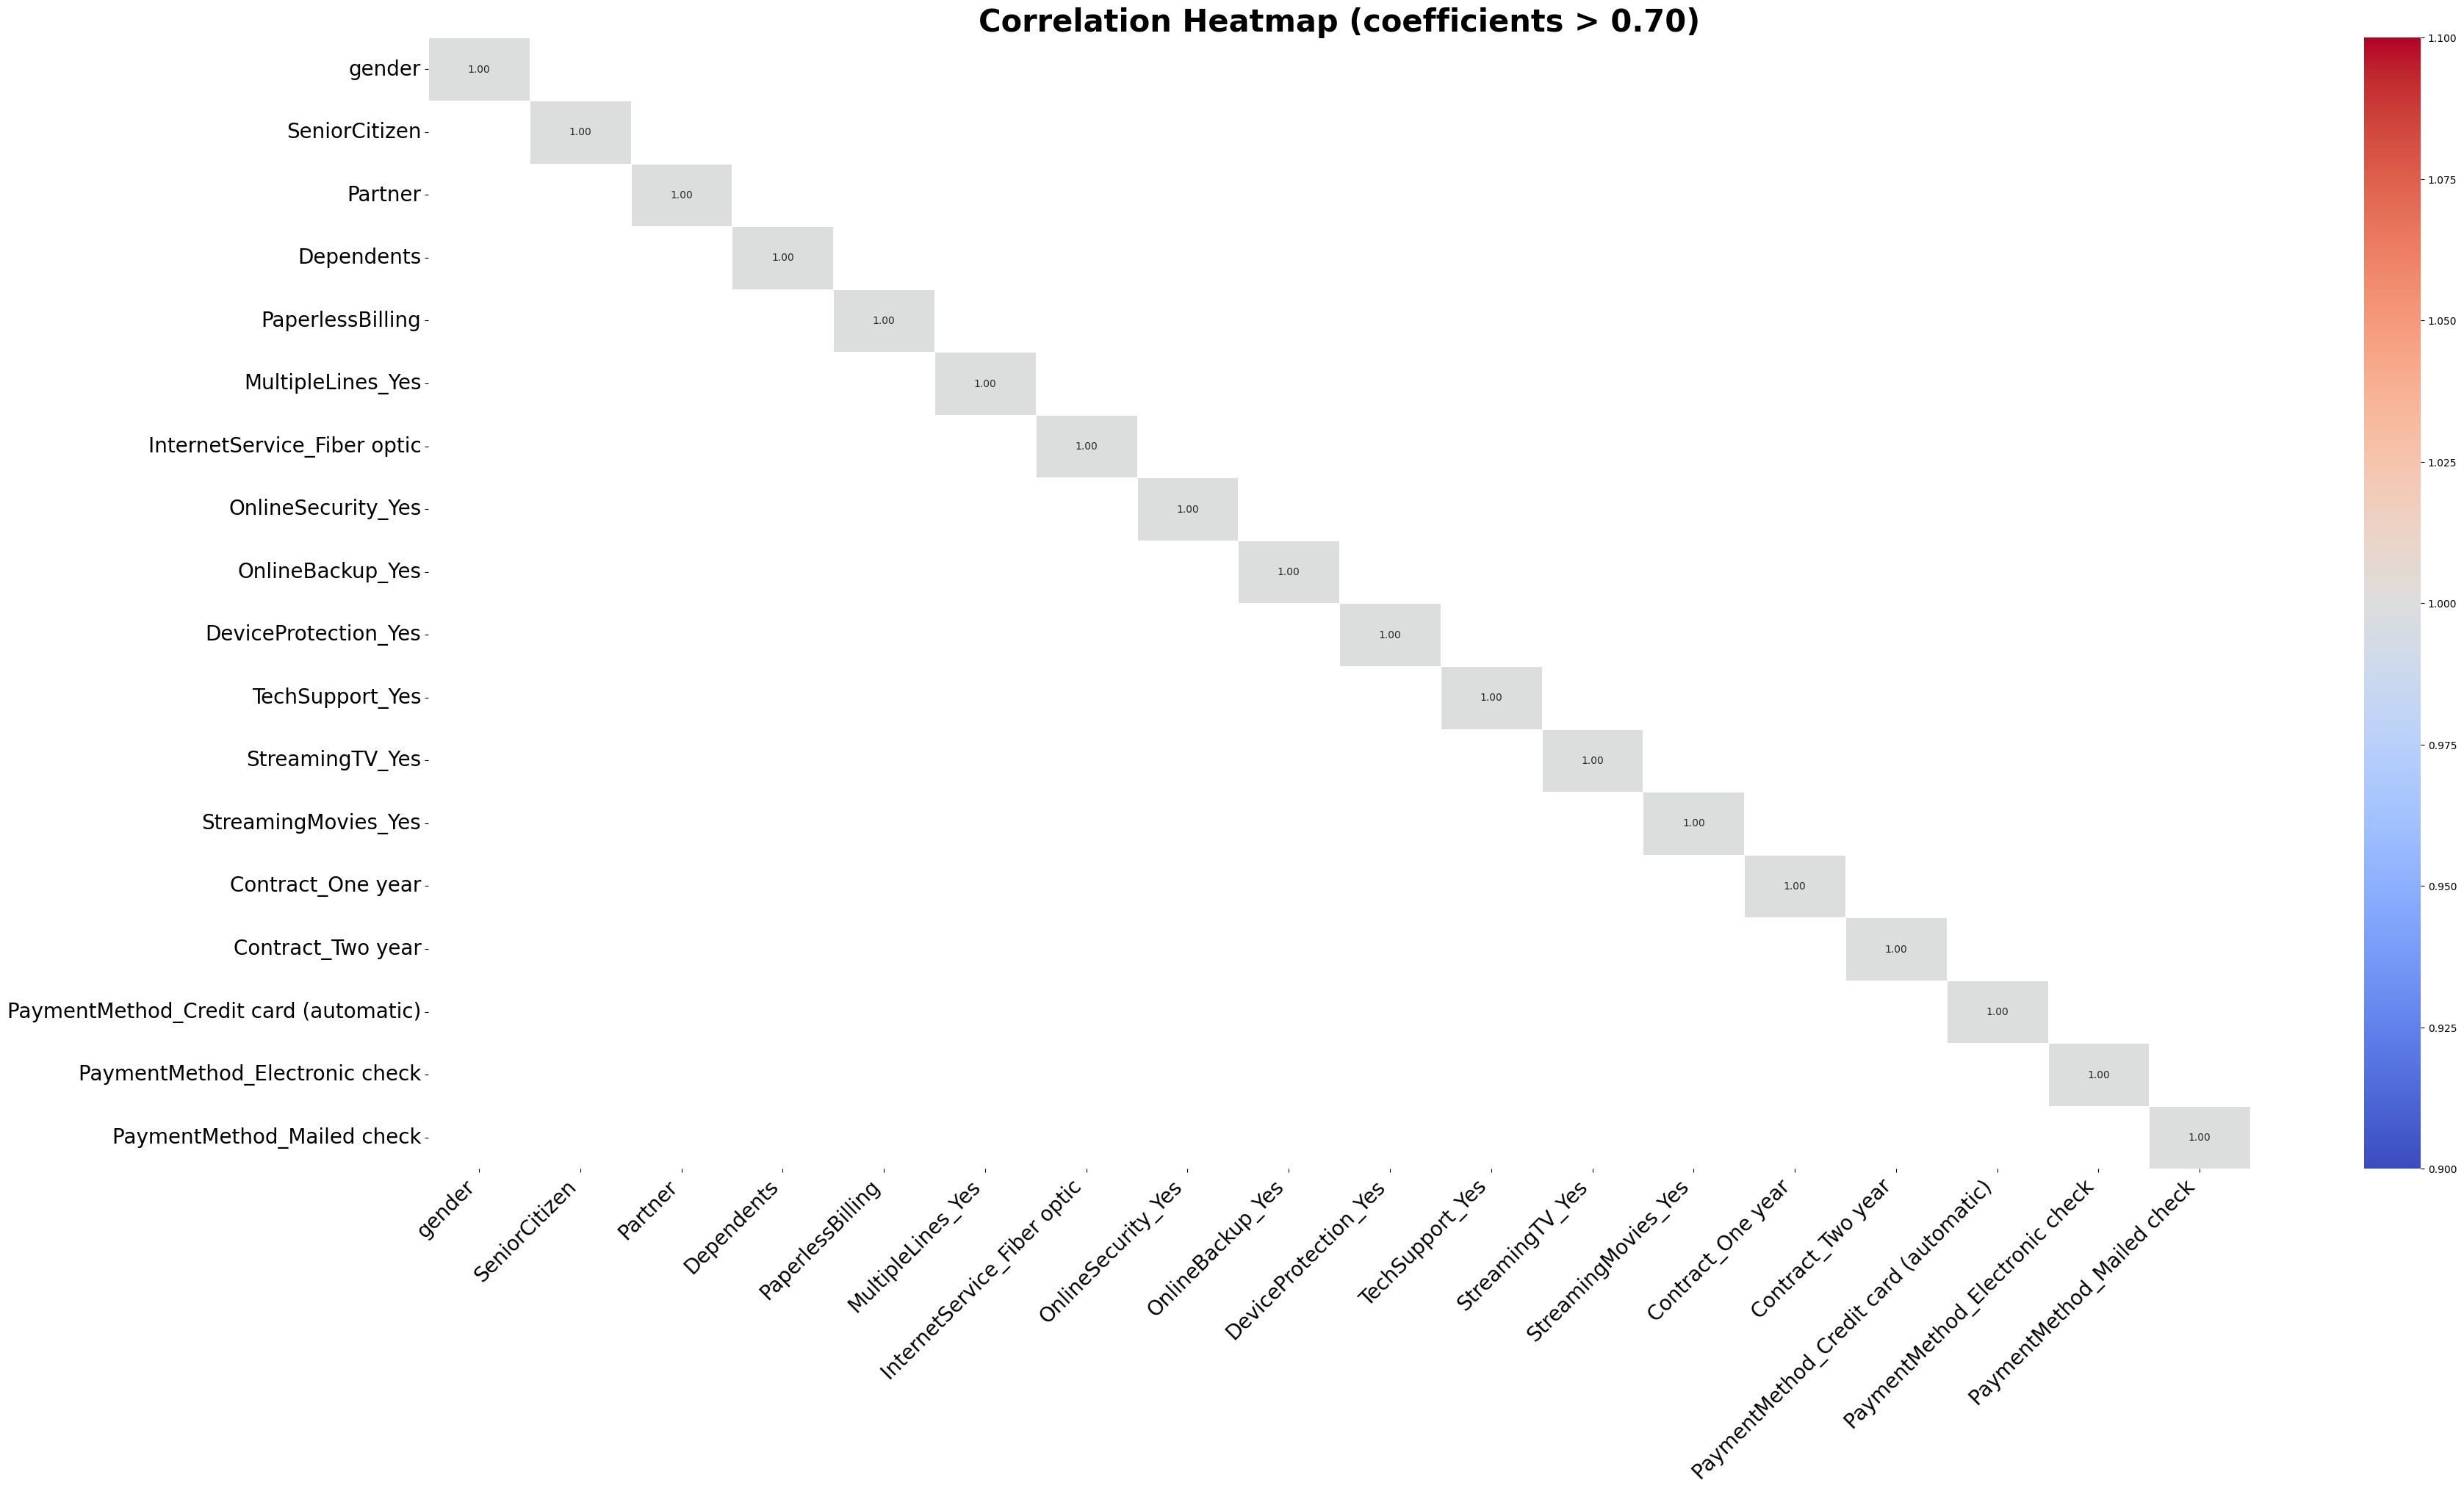

In [120]:
# Matrice de corrélation
df_cor = df_dummies1.drop("Churn", axis=1).corr()

# Filtrer uniquement les corrélations > 0.70
mask = np.abs(df_cor) >= 0.70

# Garder uniquement les lignes/colonnes pertinentes
df_cor_filtered = df_cor.where(mask).dropna(how="all").dropna(axis=1, how="all")

# Même design que ton graphique original
plt.figure(figsize=(40,20))
sns.heatmap(
    df_cor_filtered,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.7
)

plt.xticks(fontsize=20, rotation=45, ha="right")
plt.yticks(fontsize=20)

plt.title("Correlation Heatmap (coefficients > 0.70)", fontsize=30, weight="bold")
plt.show()


---

### `Variance`

In [121]:
# Suppression de la variable Churn  et calcul de la variance 
df_var = round(df_dummies1.drop("Churn", axis=1).var(), 3)
df_var = df_var.sort_values(ascending=False)

df_var

gender                                   0.250
Partner                                  0.250
InternetService_Fiber optic              0.250
MultipleLines_Yes                        0.249
PaperlessBilling                         0.241
StreamingMovies_Yes                      0.236
StreamingTV_Yes                          0.236
OnlineBackup_Yes                         0.223
PaymentMethod_Electronic check           0.223
DeviceProtection_Yes                     0.222
Dependents                               0.210
TechSupport_Yes                          0.200
OnlineSecurity_Yes                       0.198
Contract_Two year                        0.183
PaymentMethod_Mailed check               0.176
PaymentMethod_Credit card (automatic)    0.169
Contract_One year                        0.165
SeniorCitizen                            0.137
dtype: float64

---

### `Features Vs Churn`

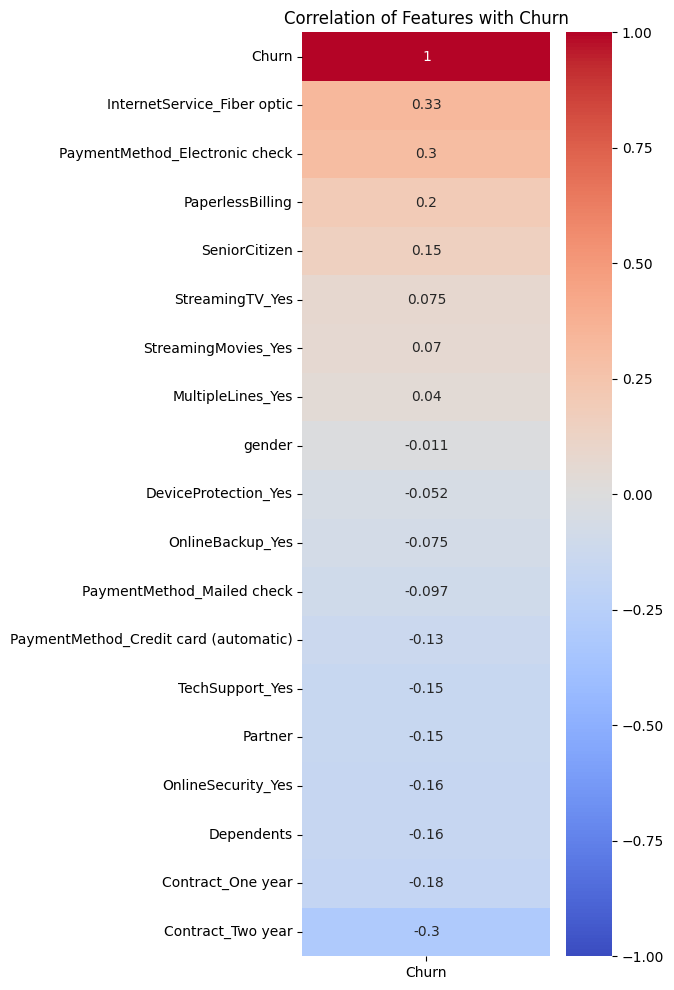

In [122]:
# Matrice de correlation uniquement avec les variables quant 
corr_matrix = df_dummies1.corr(numeric_only=True)

# Correlation avec la variable Chrun
churn_corr = corr_matrix[['Churn']].sort_values(by='Churn', ascending=False)

# Heatmap
plt.figure(figsize=(4, 12))
sns.heatmap(churn_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Churn')
plt.show()


### `Note :`

`Négatif (valeur plus faible → moins de risque de churn)` :

- tenure (-0,35) → Les clients qui restent plus longtemps sont moins susceptibles de résilier.
- Contract_Two year (-0,30) → Les clients avec un contrat de deux ans résilient beaucoup moins.
- Contract_One year (-0,18) → Même tendance, mais moins marquée que pour les contrats de deux ans.
  
`Positif (valeur plus élevée → plus de risque de churn)` :

- InternetService_Fiber optic (+0,31) → Les utilisateurs de fibre optique résilient davantage dans ce jeu de données.
- PaymentMethod_Electronic check (+0,30) → Les clients qui paient par chèque électronique résilient plus souvent.
- MonthlyCharge (+0.19) → Les clients dont le montant facturé mensuellement est élevé résilient plus souvent.




---

In [123]:
# Save data
df_dummies1.to_csv("src/data/process/churn_clean2.csv", index=False) 